# Data Preparation - LMA Features Data

### Note: Datasets follow the format preprocess_datasetname
So we have, for example: Fs_B_dataset1.csv -> Dataset was first Feature Selected and then Balanced

Fs - Feature Selected

B - Balanced

N - Normalized

S - Standardized

## Imports

In [65]:
import ast
import csv
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from imblearn.over_sampling import SMOTENC, SMOTE
from imblearn.under_sampling import NearMiss
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder
import joblib
from collections import Counter
import numpy as np

### Load Dataset

In [88]:
data = pd.read_csv('datasets/DANCE_WALK_KIN_1sec.csv')

In [89]:
data.head()

,max_hand_distance,avg_l_hand_hip_distance,avg_r_hand_hip_distance,max_stride_length,avg_l_hand_chest_distance,avg_r_hand_chest_distance,avg_l_elbow_hip_distance,avg_r_elbow_hip_distance,avg_chest_pelvis_distance,avg_neck_chest_distance,...,l_foot_movement_jerk_z,r_foot_movement_jerk_x,r_foot_movement_jerk_y,r_foot_movement_jerk_z,neck_movement_jerk_x,neck_movement_jerk_y,neck_movement_jerk_z,EMOTION_P,EMOTION_A,EMOTION_D
0,0.483402,0.266753,0.231481,0.485866,0.468827,0.452886,0.350871,0.334321,0.286151,0.278749,...,0.416963,0.045123,-0.111529,0.339270,-0.321348,0.017921,0.477275,-0.5,0.6,0.9
1,0.500120,0.328175,0.311643,0.453223,0.436114,0.440360,0.333428,0.333333,0.286151,0.278734,...,-1.070198,0.091503,0.213905,-0.799065,0.938129,-0.060268,-1.054568,-0.5,0.6,0.9
2,0.672433,0.458851,0.484472,0.494846,0.455937,0.417182,0.356992,0.318336,0.286151,0.278509,...,1.026125,-0.476917,-0.098753,0.748896,-0.981100,0.024249,0.724705,-0.5,0.6,0.9
3,0.821350,0.331003,0.345881,0.499998,0.492491,0.473935,0.378241,0.357670,0.286151,0.278548,...,-0.827843,0.388929,0.068525,-0.848111,0.347235,0.142775,-0.434821,-0.5,0.6,0.9
4,1.067582,0.267370,0.567160,0.513692,0.462154,0.571669,0.352222,0.453857,0.286151,0.278663,...,0.864266,0.038455,-0.172785,1.058543,0.106772,-0.248048,0.542876,-0.5,0.6,0.9


## Feature Selection

In [90]:
data = pd.read_csv('datasets/DANCE_WALK_KIN_1sec.csv')

In [91]:
y = pd.concat([data.pop(x) for x in ['EMOTION_P', 'EMOTION_A', 'EMOTION_D']], axis=1)
X = data

data.head()

,max_hand_distance,avg_l_hand_hip_distance,avg_r_hand_hip_distance,max_stride_length,avg_l_hand_chest_distance,avg_r_hand_chest_distance,avg_l_elbow_hip_distance,avg_r_elbow_hip_distance,avg_chest_pelvis_distance,avg_neck_chest_distance,...,r_hand_movement_jerk_z,l_foot_movement_jerk_x,l_foot_movement_jerk_y,l_foot_movement_jerk_z,r_foot_movement_jerk_x,r_foot_movement_jerk_y,r_foot_movement_jerk_z,neck_movement_jerk_x,neck_movement_jerk_y,neck_movement_jerk_z
0,0.483402,0.266753,0.231481,0.485866,0.468827,0.452886,0.350871,0.334321,0.286151,0.278749,...,0.412834,-0.236966,0.025232,0.416963,0.045123,-0.111529,0.339270,-0.321348,0.017921,0.477275
1,0.500120,0.328175,0.311643,0.453223,0.436114,0.440360,0.333428,0.333333,0.286151,0.278734,...,-0.746152,0.855170,-0.047505,-1.070198,0.091503,0.213905,-0.799065,0.938129,-0.060268,-1.054568
2,0.672433,0.458851,0.484472,0.494846,0.455937,0.417182,0.356992,0.318336,0.286151,0.278509,...,-0.257443,-1.133321,-0.021837,1.026125,-0.476917,-0.098753,0.748896,-0.981100,0.024249,0.724705
3,0.821350,0.331003,0.345881,0.499998,0.492491,0.473935,0.378241,0.357670,0.286151,0.278548,...,1.126059,0.633565,0.146613,-0.827843,0.388929,0.068525,-0.848111,0.347235,0.142775,-0.434821
4,1.067582,0.267370,0.567160,0.513692,0.462154,0.571669,0.352222,0.453857,0.286151,0.278663,...,-0.146206,-0.168159,-0.216873,0.864266,0.038455,-0.172785,1.058543,0.106772,-0.248048,0.542876


### Variance Analysis

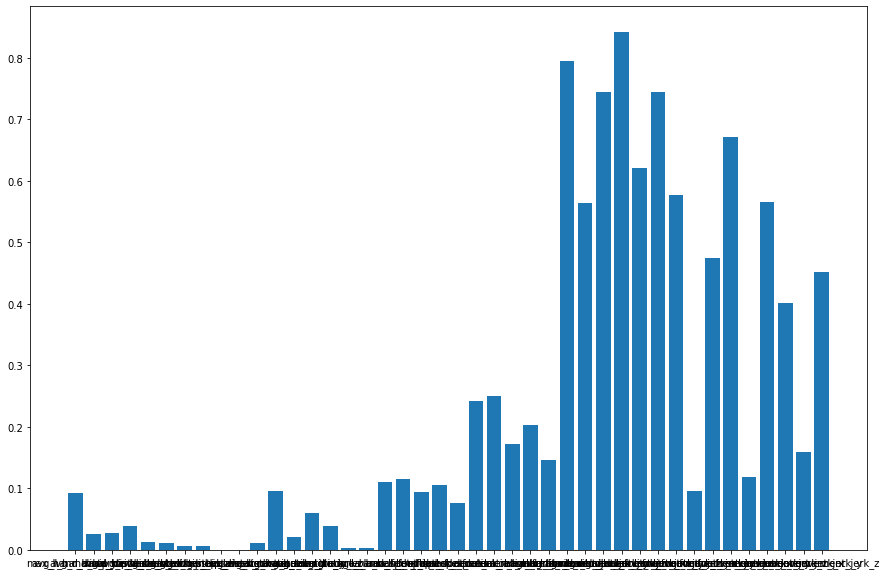

max_hand_distance  -  0.09166625031969326
avg_l_hand_hip_distance  -  0.025547869686916757
avg_r_hand_hip_distance  -  0.02731946552084746
max_stride_length  -  0.039513143272336494
avg_l_hand_chest_distance  -  0.012243881523194654
avg_r_hand_chest_distance  -  0.011917063752859797
avg_l_elbow_hip_distance  -  0.006132856651219529
avg_r_elbow_hip_distance  -  0.006002265120017792
avg_chest_pelvis_distance  -  3.347900308471026e-19
avg_neck_chest_distance  -  1.2845910446202134e-05
avg_neck_rotation_w  -  0.010751261605361856
avg_neck_rotation_x  -  0.09544423174142075
avg_neck_rotation_y  -  0.02020881227423806
avg_neck_rotation_z  -  0.05978589222419838
avg_total_body_volume  -  0.03856154172962465
avg_triangle_area_hands_neck  -  0.0032877689163072375
avg_triangle_area_feet_hips  -  0.003235660040245255
l_hand_speed  -  0.11026768159368149
r_hand_speed  -  0.1148060046504557
l_foot_speed  -  0.09342749185061554
r_foot_speed  -  0.10624328747717603
neck_speed  -  0.07688396841485219


In [92]:
x_fs = []
y_fs = []
for i in data.columns:
    x_fs.append(data[i].var())
    y_fs.append(i)


fig, ax = plt.subplots(figsize=(15,10))

ax.bar(y_fs, x_fs)

plt.show()

for i in data.columns:
    print(i, " - ", data[i].var())

### Remove highly correlated features

In [93]:
data = pd.read_csv('datasets/DANCE_WALK_KIN_1sec.csv')

In [94]:
y = pd.concat([data.pop(x) for x in ['EMOTION_P', 'EMOTION_A', 'EMOTION_D']], axis=1)
X = data

data.head()

,max_hand_distance,avg_l_hand_hip_distance,avg_r_hand_hip_distance,max_stride_length,avg_l_hand_chest_distance,avg_r_hand_chest_distance,avg_l_elbow_hip_distance,avg_r_elbow_hip_distance,avg_chest_pelvis_distance,avg_neck_chest_distance,...,r_hand_movement_jerk_z,l_foot_movement_jerk_x,l_foot_movement_jerk_y,l_foot_movement_jerk_z,r_foot_movement_jerk_x,r_foot_movement_jerk_y,r_foot_movement_jerk_z,neck_movement_jerk_x,neck_movement_jerk_y,neck_movement_jerk_z
0,0.483402,0.266753,0.231481,0.485866,0.468827,0.452886,0.350871,0.334321,0.286151,0.278749,...,0.412834,-0.236966,0.025232,0.416963,0.045123,-0.111529,0.339270,-0.321348,0.017921,0.477275
1,0.500120,0.328175,0.311643,0.453223,0.436114,0.440360,0.333428,0.333333,0.286151,0.278734,...,-0.746152,0.855170,-0.047505,-1.070198,0.091503,0.213905,-0.799065,0.938129,-0.060268,-1.054568
2,0.672433,0.458851,0.484472,0.494846,0.455937,0.417182,0.356992,0.318336,0.286151,0.278509,...,-0.257443,-1.133321,-0.021837,1.026125,-0.476917,-0.098753,0.748896,-0.981100,0.024249,0.724705
3,0.821350,0.331003,0.345881,0.499998,0.492491,0.473935,0.378241,0.357670,0.286151,0.278548,...,1.126059,0.633565,0.146613,-0.827843,0.388929,0.068525,-0.848111,0.347235,0.142775,-0.434821
4,1.067582,0.267370,0.567160,0.513692,0.462154,0.571669,0.352222,0.453857,0.286151,0.278663,...,-0.146206,-0.168159,-0.216873,0.864266,0.038455,-0.172785,1.058543,0.106772,-0.248048,0.542876


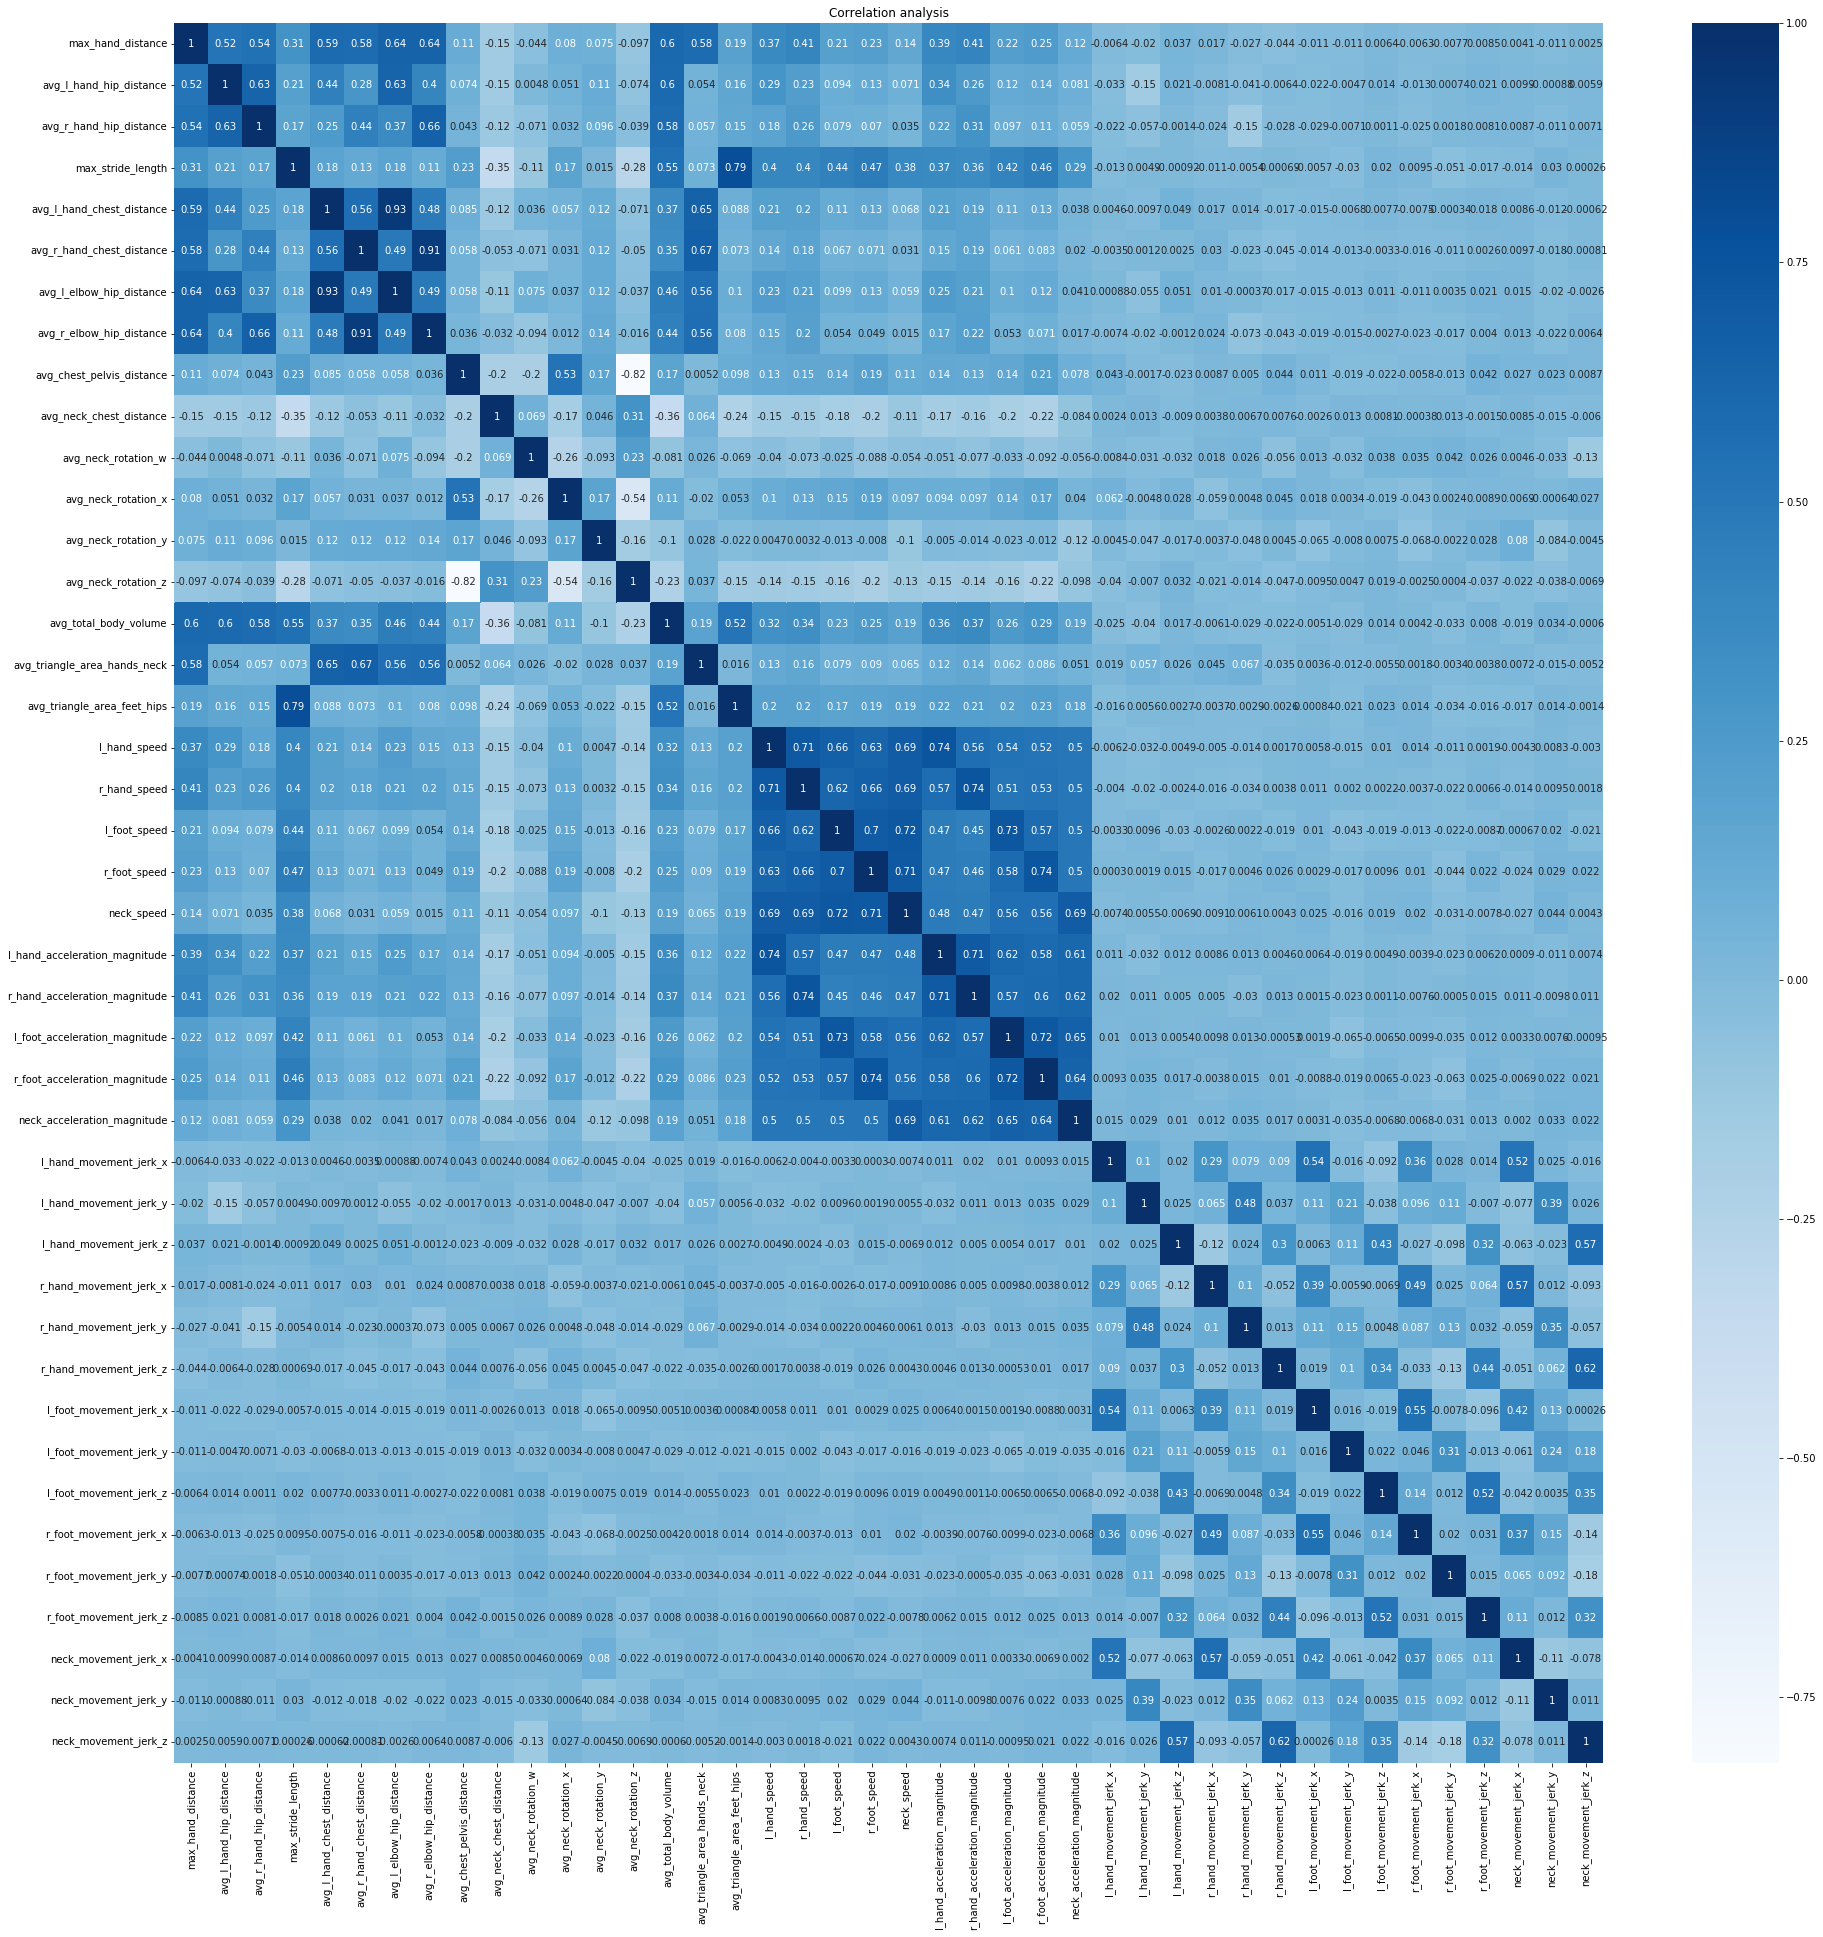

In [95]:
fig = plt.figure(figsize=[32,32])
corr_mtx = data.corr()
sns.heatmap(corr_mtx, xticklabels=corr_mtx.columns, yticklabels=corr_mtx.columns, annot=True, cmap='Blues')
plt.title('Correlation analysis')
plt.show()

In [96]:
cor_matrix = data.corr().abs()
upper_tri = cor_matrix.where(np.triu(np.ones(cor_matrix.shape),k=1).astype(bool))
to_drop = [column for column in upper_tri.columns if any(upper_tri[column] > 0.95)]
print(to_drop)

[]


In [97]:
df = pd.read_csv('datasets/DANCE_WALK_KIN_1sec.csv')

cor = df.corr()

#Correlation with output variable
cor_target = abs(cor["EMOTION_P"])
print("===CORRELATION BETWEEN VAR AND PLEASURE COORDINATE===")
print(cor_target)

cor_target = abs(cor["EMOTION_A"])
print("\n===CORRELATION BETWEEN VAR AND AROUSAL COORDINATE===")
print(cor_target)

cor_target = abs(cor["EMOTION_D"])
print("\n===CORRELATION BETWEEN VAR AND DOMINANCE COORDINATE===")
print(cor_target)

===CORRELATION BETWEEN VAR AND PLEASURE COORDINATE===
max_hand_distance                0.324248
avg_l_hand_hip_distance          0.275666
avg_r_hand_hip_distance          0.231924
max_stride_length                0.264138
avg_l_hand_chest_distance        0.212465
avg_r_hand_chest_distance        0.167063
avg_l_elbow_hip_distance         0.224045
avg_r_elbow_hip_distance         0.172903
avg_chest_pelvis_distance        0.157582
avg_neck_chest_distance          0.160700
avg_neck_rotation_w              0.050646
avg_neck_rotation_x              0.087640
avg_neck_rotation_y              0.103704
avg_neck_rotation_z              0.175352
avg_total_body_volume            0.287122
avg_triangle_area_hands_neck     0.075926
avg_triangle_area_feet_hips      0.125886
l_hand_speed                     0.268198
r_hand_speed                     0.258517
l_foot_speed                     0.193980
r_foot_speed                     0.211540
neck_speed                       0.112984
l_hand_acceleration_ma

In [98]:
X = X.drop(columns=[
    "l_hand_movement_jerk_x", "l_hand_movement_jerk_y", "l_hand_movement_jerk_z",
    "r_hand_movement_jerk_x", "r_hand_movement_jerk_y", "r_hand_movement_jerk_z",
    "l_foot_movement_jerk_x", "l_foot_movement_jerk_y", "l_foot_movement_jerk_z",
    "r_foot_movement_jerk_x", "r_foot_movement_jerk_y", "r_foot_movement_jerk_z",
    "neck_movement_jerk_x", "neck_movement_jerk_y", "neck_movement_jerk_z",
])

In [99]:
#Store

fullData = X.join(y, how='right')
fullData.to_csv(r'datasets/Fs_DANCE_WALK_KIN_1sec.csv', index = False)

In [100]:
data = pd.read_csv('datasets/Fs_DANCE_WALK_KIN_1sec.csv')

data.head()

,max_hand_distance,avg_l_hand_hip_distance,avg_r_hand_hip_distance,max_stride_length,avg_l_hand_chest_distance,avg_r_hand_chest_distance,avg_l_elbow_hip_distance,avg_r_elbow_hip_distance,avg_chest_pelvis_distance,avg_neck_chest_distance,...,r_foot_speed,neck_speed,l_hand_acceleration_magnitude,r_hand_acceleration_magnitude,l_foot_acceleration_magnitude,r_foot_acceleration_magnitude,neck_acceleration_magnitude,EMOTION_P,EMOTION_A,EMOTION_D
0,0.483402,0.266753,0.231481,0.485866,0.468827,0.452886,0.350871,0.334321,0.286151,0.278749,...,0.359971,0.575654,0.483178,0.435628,0.480258,0.359971,0.575654,-0.5,0.6,0.9
1,0.500120,0.328175,0.311643,0.453223,0.436114,0.440360,0.333428,0.333333,0.286151,0.278734,...,0.218273,0.312859,0.995506,0.840211,0.899660,0.490468,0.845860,-0.5,0.6,0.9
2,0.672433,0.458851,0.484472,0.494846,0.455937,0.417182,0.356992,0.318336,0.286151,0.278509,...,0.231481,0.093807,1.559399,0.945012,0.637447,0.446531,0.393429,-0.5,0.6,0.9
3,0.821350,0.331003,0.345881,0.499998,0.492491,0.473935,0.378241,0.357670,0.286151,0.278548,...,0.411042,0.267856,1.488180,0.784444,0.481164,0.565742,0.313752,-0.5,0.6,0.9
4,1.067582,0.267370,0.567160,0.513692,0.462154,0.571669,0.352222,0.453857,0.286151,0.278663,...,0.116532,0.044175,0.761068,0.829884,0.427888,0.516958,0.297537,-0.5,0.6,0.9


## Data Balancing

In [107]:
data = pd.read_csv('datasets/labels/DANCE_WALK_KIN_1sec.csv')
data.head()

,max_hand_distance,avg_l_hand_hip_distance,avg_r_hand_hip_distance,max_stride_length,avg_l_hand_chest_distance,avg_r_hand_chest_distance,avg_l_elbow_hip_distance,avg_r_elbow_hip_distance,avg_chest_pelvis_distance,avg_neck_chest_distance,...,l_foot_movement_jerk_x,l_foot_movement_jerk_y,l_foot_movement_jerk_z,r_foot_movement_jerk_x,r_foot_movement_jerk_y,r_foot_movement_jerk_z,neck_movement_jerk_x,neck_movement_jerk_y,neck_movement_jerk_z,EMOTION
0,0.483402,0.266753,0.231481,0.485866,0.468827,0.452886,0.350871,0.334321,0.286151,0.278749,...,-0.236966,0.025232,0.416963,0.045123,-0.111529,0.339270,-0.321348,0.017921,0.477275,angry
1,0.500120,0.328175,0.311643,0.453223,0.436114,0.440360,0.333428,0.333333,0.286151,0.278734,...,0.855170,-0.047505,-1.070198,0.091503,0.213905,-0.799065,0.938129,-0.060268,-1.054568,angry
2,0.672433,0.458851,0.484472,0.494846,0.455937,0.417182,0.356992,0.318336,0.286151,0.278509,...,-1.133321,-0.021837,1.026125,-0.476917,-0.098753,0.748896,-0.981100,0.024249,0.724705,angry
3,0.821350,0.331003,0.345881,0.499998,0.492491,0.473935,0.378241,0.357670,0.286151,0.278548,...,0.633565,0.146613,-0.827843,0.388929,0.068525,-0.848111,0.347235,0.142775,-0.434821,angry
4,1.067582,0.267370,0.567160,0.513692,0.462154,0.571669,0.352222,0.453857,0.286151,0.278663,...,-0.168159,-0.216873,0.864266,0.038455,-0.172785,1.058543,0.106772,-0.248048,0.542876,angry


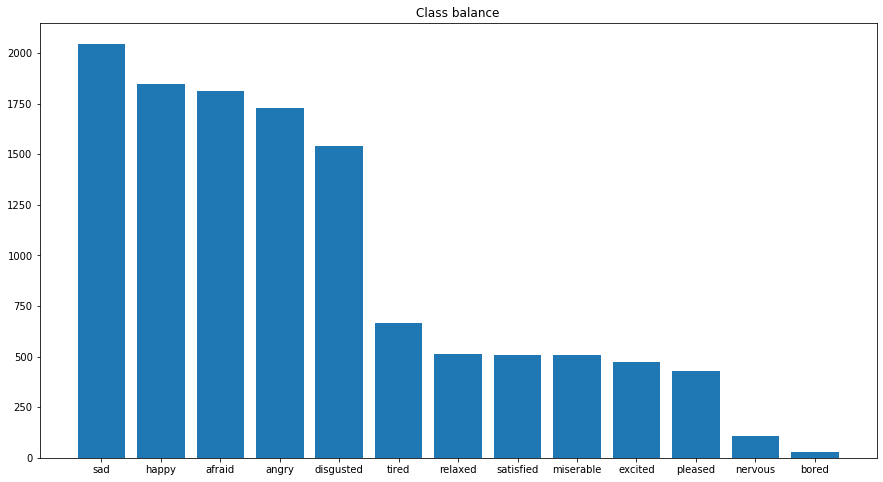

Minority class: 28
Majority class: 1814
Proportion: 0.02 : 1.0


In [108]:
target_count = data['EMOTION'].value_counts()

plt.figure(figsize=(15,8))
plt.title('Class balance')
plt.bar([str(a) for a in target_count.index], target_count.values)
plt.show()
min_class = target_count.idxmin()
ind_min_class = target_count.index.get_loc(min_class)

print('Minority class:', target_count[ind_min_class])
print('Majority class:', target_count[1-ind_min_class])
print('Proportion:', round(target_count[ind_min_class] / target_count[1-ind_min_class], 2), ': 1.0')

Class=angry, n=1727 (14.141%)
Class=happy, n=1849 (15.140%)
Class=sad, n=2046 (16.753%)
Class=disgusted, n=1539 (12.601%)
Class=afraid, n=1814 (14.853%)
Class=excited, n=474 (3.881%)
Class=tired, n=667 (5.461%)
Class=pleased, n=428 (3.504%)
Class=satisfied, n=509 (4.168%)
Class=bored, n=28 (0.229%)
Class=relaxed, n=513 (4.200%)
Class=miserable, n=509 (4.168%)
Class=nervous, n=110 (0.901%)


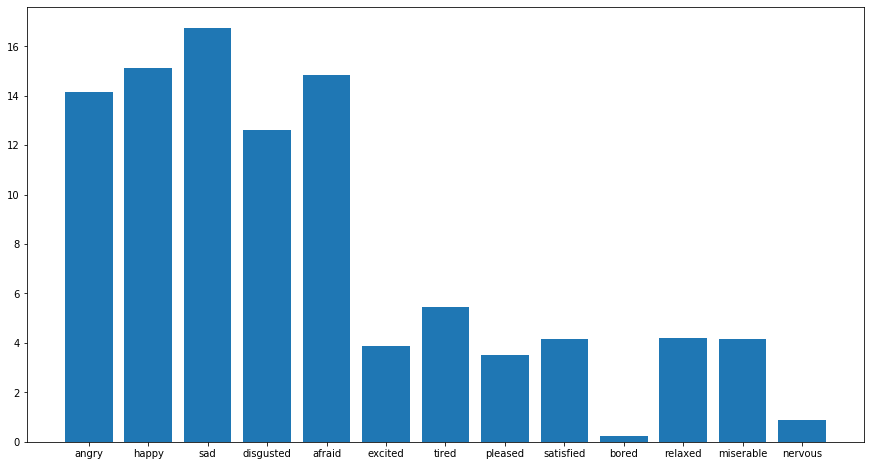

In [109]:
data = pd.read_csv('datasets/labels/DANCE_WALK_KIN_1sec.csv')


values = data.values
# split into input and output elements
X, y = values[:, :-1], values[:, -1]

# summarize distribution
counter = Counter(y)
perc = []
for k,v in counter.items():
    per = v / len(y) * 100
    perc.append(per)
    print('Class=%s, n=%d (%.3f%%)' % (k, v, per))
    
    
# plot the distribution
plt.figure(figsize=(15,8))
plt.bar(counter.keys(), perc)
plt.show()

### Undersample

Class=afraid, n=1000 (8.188%)
Class=angry, n=1000 (8.188%)
Class=bored, n=28 (0.229%)
Class=disgusted, n=1000 (8.188%)
Class=excited, n=474 (3.881%)
Class=happy, n=1000 (8.188%)
Class=miserable, n=509 (4.168%)
Class=nervous, n=110 (0.901%)
Class=pleased, n=428 (3.504%)
Class=relaxed, n=513 (4.200%)
Class=sad, n=1000 (8.188%)
Class=satisfied, n=509 (4.168%)
Class=tired, n=667 (5.461%)


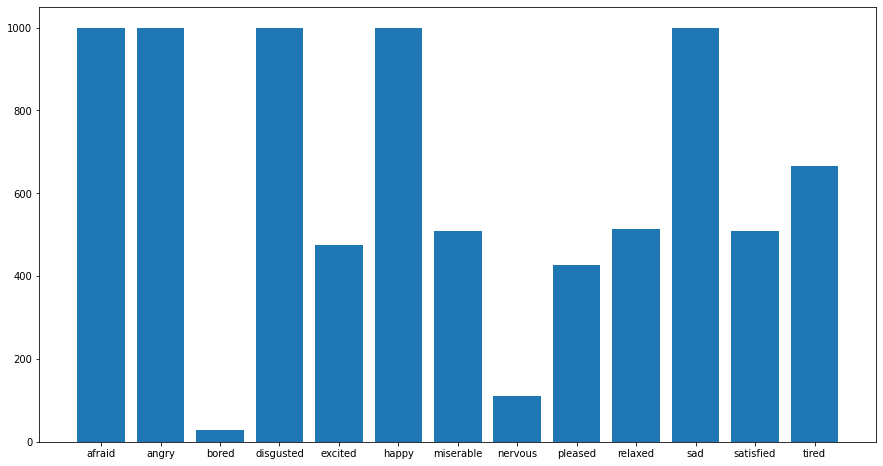

In [128]:
#strategy = {"angry":339, "happy": 400, "sad": 338, "afraid": 385, "pleased": 400, "bored": 28, "tired": 400, "relaxed": 400, "excited": 400, "miserable": 400, "satisfied": 400, "nervous": 110}
strategy = {"angry":1000,"disgusted":1000, "happy": 1000, "sad": 1000, "afraid": 1000, "pleased": 428, "bored": 28, "tired": 667, "relaxed": 513, "excited": 474, "miserable": 509, "satisfied": 509, "nervous": 110}


nm = NearMiss(sampling_strategy=strategy)
X_res, y_res = nm.fit_resample(X, y)

# summarize distribution
counter = Counter(y_res)
perc = []
for k,v in counter.items():
    per = v / len(y) * 100
    perc.append(per)
    print('Class=%s, n=%d (%.3f%%)' % (k, v, per))
    
    
# plot the distribution
plt.figure(figsize=(15,8))
plt.bar(counter.keys(), counter.values())
plt.show()

### SMOTE

Class=afraid, n=600 (7.692%)
Class=angry, n=600 (7.692%)
Class=bored, n=600 (7.692%)
Class=disgusted, n=600 (7.692%)
Class=excited, n=600 (7.692%)
Class=happy, n=600 (7.692%)
Class=miserable, n=600 (7.692%)
Class=nervous, n=600 (7.692%)
Class=pleased, n=600 (7.692%)
Class=relaxed, n=600 (7.692%)
Class=sad, n=600 (7.692%)
Class=satisfied, n=600 (7.692%)
Class=tired, n=600 (7.692%)


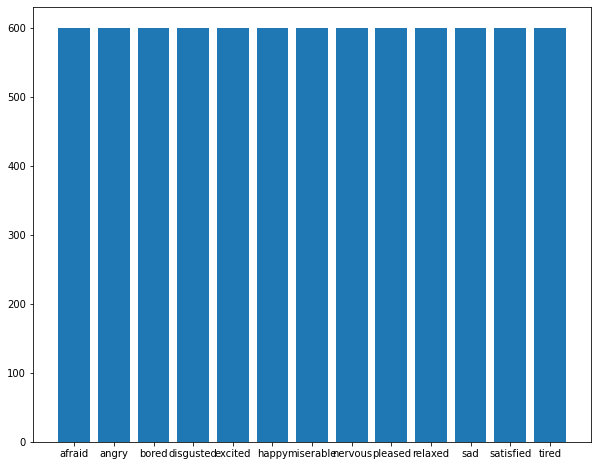

In [111]:
#strategy = {"angry":400, "happy": 400, "sad": 400, "afraid": 400, "pleased": 400, "bored": 400, "tired": 400, "relaxed": 400, "excited": 400, "miserable": 400, "satisfied": 400, "nervous": 400}
strategy = {"angry":600, "happy": 600, "sad": 600, "afraid": 600, "pleased": 600, "bored": 600, "tired": 600, "relaxed": 600, "excited": 600, "miserable": 600, "satisfied": 600, "nervous": 600, "disgusted": 600}


# transform the dataset
oversample = SMOTE(sampling_strategy=strategy)
X, y = oversample.fit_resample(X_res, y_res)

# summarize distribution
counter = Counter(y)
perc = []
for k,v in counter.items():
    per = v / len(y) * 100
    perc.append(per)
    print('Class=%s, n=%d (%.3f%%)' % (k, v, per))
    
# plot the distribution
plt.figure(figsize=(10,8))
plt.bar(counter.keys(), counter.values())
plt.show()

### Store data

In [110]:
conv_dict = {
    "angry": (-0.5, 0.6, 0.9),
    "happy": (0.6, 0.5, 0.2),
    "sad": (-0.6, -0.3, -0.3),
    "disgusted": (-0.4, 0.25, -0.1) ,
    "afraid": (-0.35, 0.7, -0.8),
    "pleased": (0.7, 0.2, 0.2),
    "bored": (-0.5, -0.7, -0.25),
    "tired": (0.1, -0.7, -0.2),
    "relaxed": (0.6, -0.55, 0.1),
    "excited": (0.5, 0.7, 0.4),
    "miserable": (-0.85, -0.1, -0.8),
    "nervous": (-0.3, -0.66, -0.7),
    "satisfied": (0.9, -0.25, 0.65),   
}

In [111]:
header = ["max_hand_distance",
          "avg_l_hand_hip_distance",
          "avg_r_hand_hip_distance",
          "max_stride_length",
          "avg_l_hand_chest_distance",
          "avg_r_hand_chest_distance",
          "avg_l_elbow_hip_distance",
          "avg_r_elbow_hip_distance",
          "avg_chest_pelvis_distance",
          "avg_neck_chest_distance",
          "avg_neck_rotation_w", "avg_neck_rotation_x", "avg_neck_rotation_y", "avg_neck_rotation_z",
          "avg_total_body_volume",
          "avg_triangle_area_hands_neck",
          "avg_triangle_area_feet_hips",
          
          "l_hand_speed",
          "r_hand_speed",
          "l_foot_speed",
          "r_foot_speed",
          "neck_speed",
          
          "l_hand_acceleration_magnitude",
          "r_hand_acceleration_magnitude",
          "l_foot_acceleration_magnitude",
          "r_foot_acceleration_magnitude",
          "neck_acceleration_magnitude",
          
          #"l_hand_movement_jerk_x", "l_hand_movement_jerk_y", "l_hand_movement_jerk_z",
          #"r_hand_movement_jerk_x", "r_hand_movement_jerk_y", "r_hand_movement_jerk_z",
          #"l_foot_movement_jerk_x", "l_foot_movement_jerk_y", "l_foot_movement_jerk_z",
          #"r_foot_movement_jerk_x", "r_foot_movement_jerk_y", "r_foot_movement_jerk_z",
          #"neck_movement_jerk_x", "neck_movement_jerk_y", "neck_movement_jerk_z",
          
          "EMOTION_P", "EMOTION_A", "EMOTION_D"
         ]

forbidden_index = [27,28,29,30, 31,32,33,34, 35,36,37,38, 39,40,41,42]

with open('datasets/Fs_B_DANCE_WALK_KIN_1sec.csv', 'w', newline='') as csvfile:
    writer = csv.writer(csvfile, delimiter=',')
    writer.writerow(header)

    for i in range(0,len(y)):
        new_row = []
        for j in range(0,len(X[i])):
            if(j in forbidden_index):
                continue
            new_row.append(X[i][j])
                
        emotion = y[i]
        if emotion == "scared":
            emotion = "afraid"
        elif(emotion == "neutral" or emotion == "bored" or emotion == "nervous"):
            continue
                
        coordinates = conv_dict[emotion]
        new_row.append(coordinates[0])
        new_row.append(coordinates[1])
        new_row.append(coordinates[2])

        writer.writerow(new_row)

In [49]:
data = pd.read_csv('datasets/Fs_B_DANCE_WALK_0.5sec.csv')

data.head()

,max_hand_distance,avg_l_hand_hip_distance,avg_r_hand_hip_distance,max_stride_length,avg_l_hand_chest_distance,avg_r_hand_chest_distance,avg_l_elbow_hip_distance,avg_r_elbow_hip_distance,avg_chest_pelvis_distance,avg_neck_chest_distance,...,r_foot_speed,neck_speed,l_hand_acceleration_magnitude,r_hand_acceleration_magnitude,l_foot_acceleration_magnitude,r_foot_acceleration_magnitude,neck_acceleration_magnitude,EMOTION_P,EMOTION_A,EMOTION_D
0,1.347685,0.738734,0.750029,0.265600,0.677576,0.697204,0.544674,0.563073,0.286151,0.278618,...,0.003056,0.003035,0.019870,0.016691,0.043644,0.053025,0.014415,-0.35,0.7,-0.8
1,1.348750,0.739083,0.750776,0.264740,0.677642,0.697476,0.544730,0.563324,0.286151,0.278559,...,0.010137,0.000441,0.072091,0.023939,0.026367,0.014939,0.005996,-0.35,0.7,-0.8
2,1.345034,0.740744,0.751565,0.264228,0.677716,0.697627,0.544780,0.563463,0.286151,0.278467,...,0.011678,0.004609,0.017927,0.015746,0.011888,0.009061,0.009223,-0.35,0.7,-0.8
3,1.344209,0.739995,0.749265,0.264495,0.677222,0.696668,0.544343,0.562580,0.286151,0.278507,...,0.034689,0.006447,0.104179,0.024900,0.065732,0.088783,0.019284,-0.35,0.7,-0.8
4,1.344109,0.731976,0.743006,0.264412,0.675670,0.694244,0.542910,0.560357,0.286151,0.278629,...,0.011147,0.001455,0.074775,0.038912,0.033537,0.085538,0.013481,-0.35,0.7,-0.8


## Data Standardization

In [112]:
data = pd.read_csv('datasets/Fs_B_DANCE_WALK_KIN_1sec.csv')
print(data.shape)

(12075, 30)


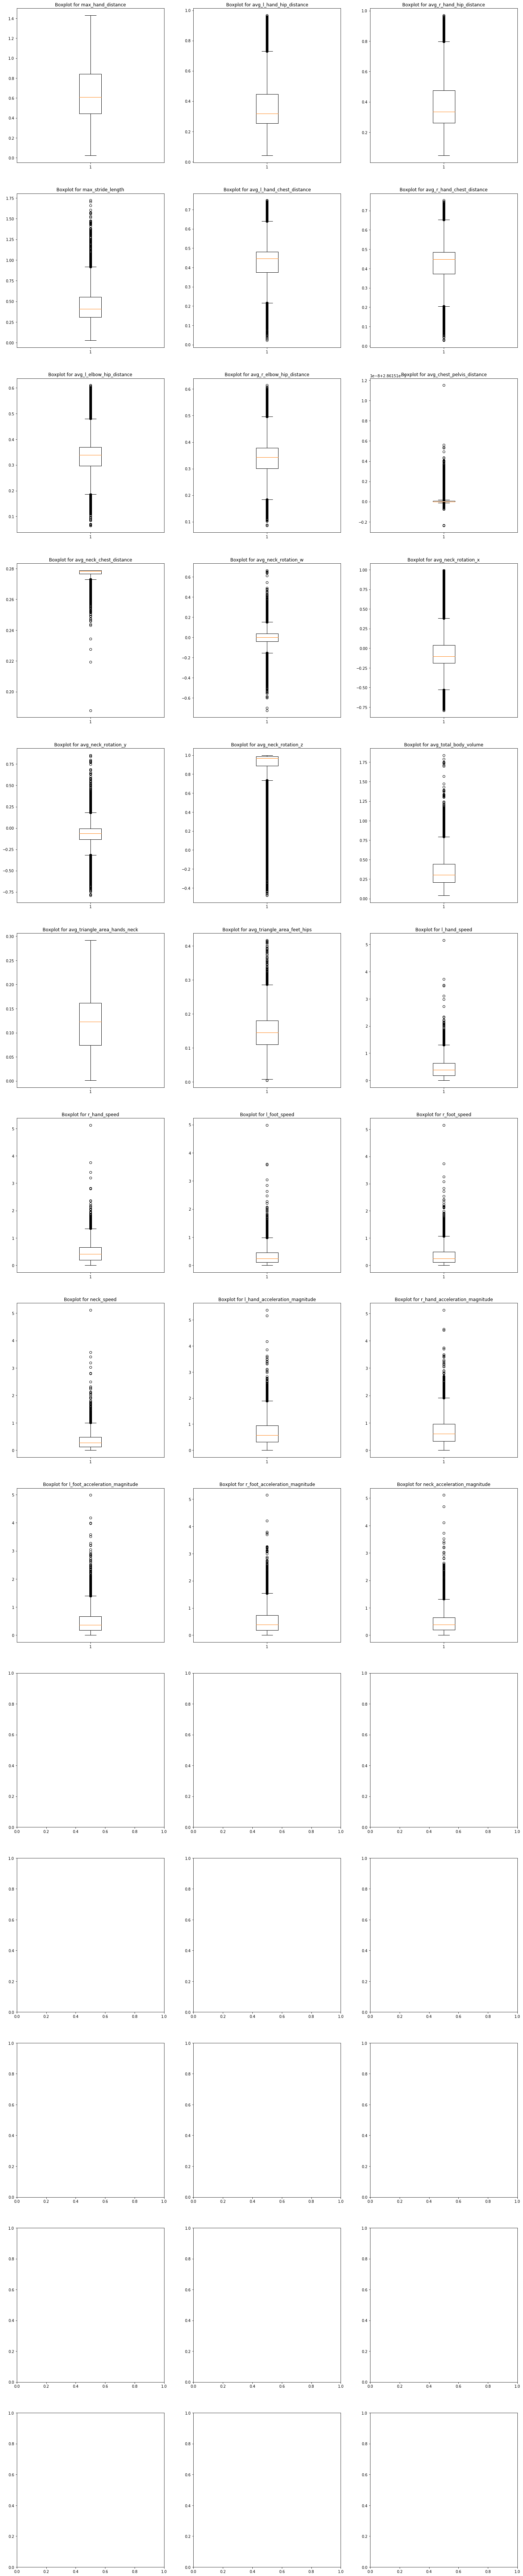

In [113]:
target = pd.concat([data.pop(x) for x in ['EMOTION_P', 'EMOTION_A', 'EMOTION_D']], axis=1)

numeric_vars = data.columns

rows = 14
cols = 3

fig, axs = plt.subplots(rows, cols, figsize=(cols * 8, rows * 9))
i, j = 0, 0

off=0
for n in range(len(numeric_vars)):
    num_unique = len(list(set(data[numeric_vars[n]].values)))
    axs[i, j].set_title('Boxplot for %s'%numeric_vars[n])
    axs[i, j].boxplot(data[numeric_vars[n]].dropna().values)
    
    i, j = (i + 1, 0) if (n+1-off) % cols == 0 else (i, j + 1)
    
plt.show()

In [114]:
numeric_data = data

transf = StandardScaler(copy=True).fit(numeric_data)
minMaxData = pd.DataFrame(transf.transform(numeric_data), columns = numeric_data.columns)
minMaxData.describe(include='all')

,max_hand_distance,avg_l_hand_hip_distance,avg_r_hand_hip_distance,max_stride_length,avg_l_hand_chest_distance,avg_r_hand_chest_distance,avg_l_elbow_hip_distance,avg_r_elbow_hip_distance,avg_chest_pelvis_distance,avg_neck_chest_distance,...,l_hand_speed,r_hand_speed,l_foot_speed,r_foot_speed,neck_speed,l_hand_acceleration_magnitude,r_hand_acceleration_magnitude,l_foot_acceleration_magnitude,r_foot_acceleration_magnitude,neck_acceleration_magnitude
count,1.207500e+04,1.207500e+04,1.207500e+04,1.207500e+04,1.207500e+04,1.207500e+04,1.207500e+04,1.207500e+04,1.207500e+04,1.207500e+04,...,1.207500e+04,1.207500e+04,1.207500e+04,1.207500e+04,1.207500e+04,1.207500e+04,1.207500e+04,1.207500e+04,1.207500e+04,1.207500e+04
mean,-7.061294e-18,4.825218e-17,1.388721e-16,9.885812e-17,-7.155445e-16,-3.354115e-16,2.494991e-16,1.176882e-18,3.821102e-08,3.082255e-15,...,4.942906e-17,-1.553485e-16,4.001400e-17,-2.824518e-17,-3.766024e-17,6.119788e-17,2.612679e-16,-1.271033e-16,1.294571e-16,1.106269e-16
std,1.000041e+00,1.000041e+00,1.000041e+00,1.000041e+00,1.000041e+00,1.000041e+00,1.000041e+00,1.000041e+00,1.000041e+00,1.000041e+00,...,1.000041e+00,1.000041e+00,1.000041e+00,1.000041e+00,1.000041e+00,1.000041e+00,1.000041e+00,1.000041e+00,1.000041e+00,1.000041e+00
min,-2.097064e+00,-2.042243e+00,-2.030468e+00,-2.098745e+00,-3.646910e+00,-3.656552e+00,-3.477602e+00,-3.319499e+00,-4.402498e+00,-2.475568e+01,...,-1.338154e+00,-1.364910e+00,-1.064785e+00,-1.062974e+00,-1.208910e+00,-1.380040e+00,-1.399446e+00,-1.159856e+00,-1.143730e+00,-1.218781e+00
25%,-7.083423e-01,-7.041382e-01,-7.347913e-01,-6.875465e-01,-4.670022e-01,-5.063277e-01,-5.359854e-01,-5.552931e-01,-3.517119e-01,-1.043866e-01,...,-7.834267e-01,-7.848365e-01,-7.277205e-01,-7.344272e-01,-7.600531e-01,-7.442938e-01,-7.469360e-01,-7.299864e-01,-7.291796e-01,-7.174233e-01
50%,-1.655937e-01,-3.042142e-01,-2.828136e-01,-1.914216e-01,1.773879e-01,1.761088e-01,1.371920e-02,-1.253888e-02,-3.202736e-01,4.313608e-01,...,-1.891742e-01,-1.746454e-01,-2.992522e-01,-3.150728e-01,-2.216575e-01,-2.097733e-01,-1.955244e-01,-2.720250e-01,-2.778521e-01,-2.292540e-01
75%,6.050964e-01,4.868265e-01,5.683221e-01,5.418852e-01,4.881339e-01,5.153685e-01,4.023611e-01,4.516065e-01,-2.280457e-01,5.291806e-01,...,5.593446e-01,5.649213e-01,4.202725e-01,4.481962e-01,5.062785e-01,5.349251e-01,5.212480e-01,4.473535e-01,4.678128e-01,4.549015e-01
max,2.546807e+00,3.749176e+00,3.563480e+00,6.408748e+00,2.898489e+00,2.959384e+00,3.455800e+00,3.485559e+00,1.954597e+01,5.622249e-01,...,1.415996e+01,1.370163e+01,1.521051e+01,1.469106e+01,1.716534e+01,9.518634e+00,8.810602e+00,1.085604e+01,1.026535e+01,1.207664e+01


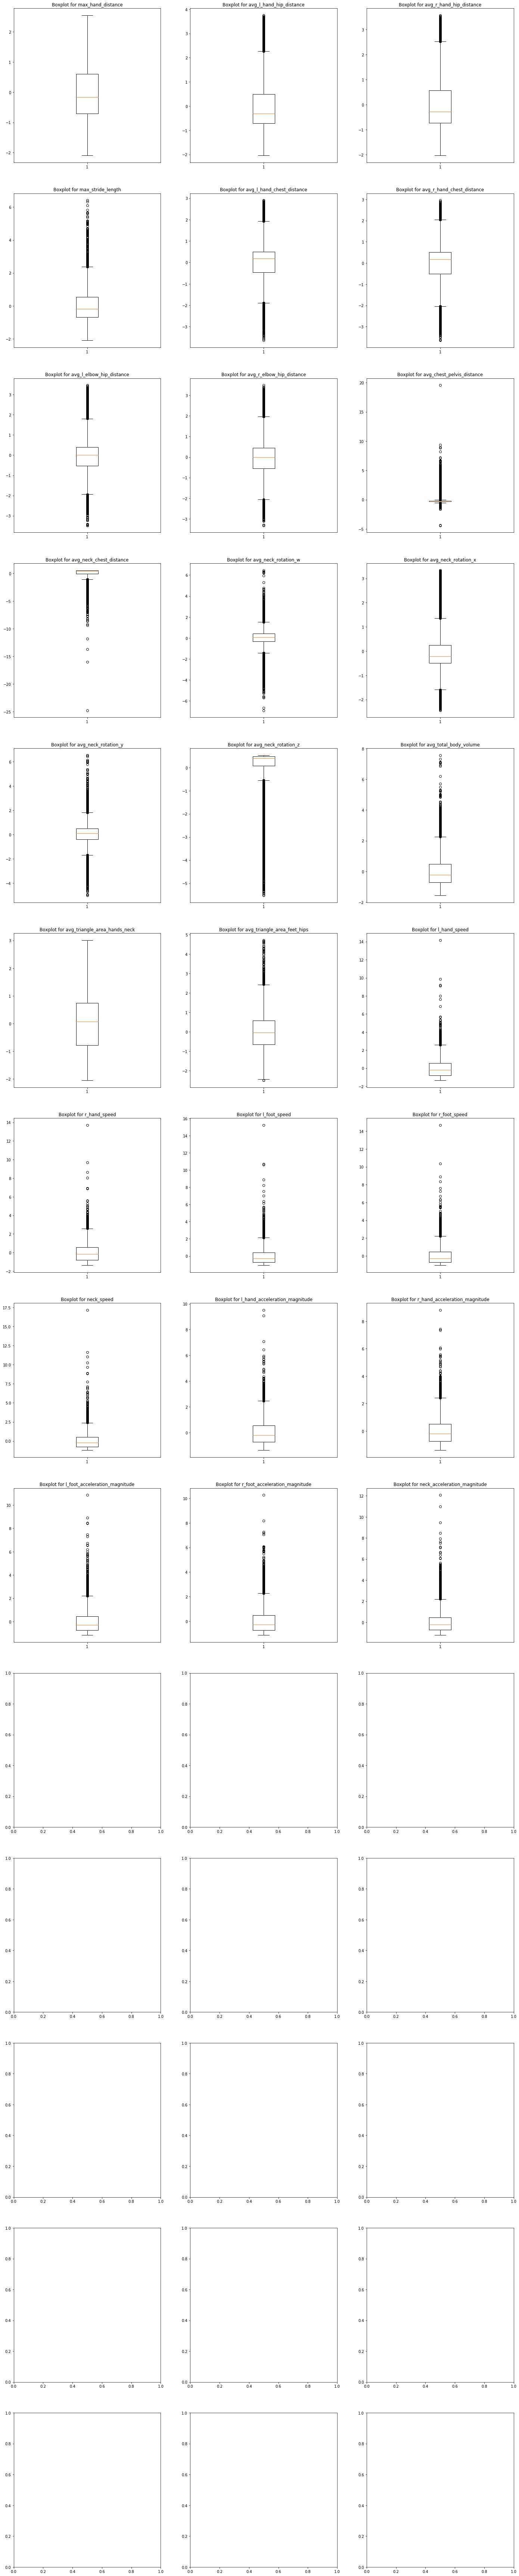

,max_hand_distance,avg_l_hand_hip_distance,avg_r_hand_hip_distance,max_stride_length,avg_l_hand_chest_distance,avg_r_hand_chest_distance,avg_l_elbow_hip_distance,avg_r_elbow_hip_distance,avg_chest_pelvis_distance,avg_neck_chest_distance,...,l_hand_speed,r_hand_speed,l_foot_speed,r_foot_speed,neck_speed,l_hand_acceleration_magnitude,r_hand_acceleration_magnitude,l_foot_acceleration_magnitude,r_foot_acceleration_magnitude,neck_acceleration_magnitude
0,-0.575058,-0.628405,-0.908175,0.207979,0.385917,0.222010,0.162003,-0.119725,-0.350256,0.521861,...,0.113136,-0.083279,0.503760,0.038092,0.859926,-0.400240,-0.530932,-0.001814,-0.346337,0.278207
1,-0.519862,-0.244149,-0.422281,0.044151,0.090955,0.107642,-0.060049,-0.132462,-0.297300,0.517712,...,0.635641,0.510255,0.400104,-0.395578,-0.084644,0.638715,0.275984,1.009642,-0.057101,0.980965
2,0.049060,0.573345,0.625293,0.253046,0.269686,-0.103971,0.239924,-0.325791,-0.300391,0.455296,...,1.398187,0.222427,-0.425904,-0.355152,-0.871989,1.782238,0.485004,0.377273,-0.154484,-0.195727
3,0.540739,-0.226458,-0.214757,0.278902,0.599288,0.414188,0.510427,0.181277,-0.387799,0.466031,...,0.487124,0.522996,-0.004831,0.194393,-0.246399,1.637811,0.164759,0.000372,0.109738,-0.402953
4,1.353718,-0.624540,1.126494,0.347630,0.325742,1.306505,0.179207,1.421256,-0.415980,0.498115,...,-0.661912,-0.061636,-0.660566,-0.706956,-1.050383,0.163297,0.255388,-0.128112,0.001612,-0.445125


In [115]:
numeric_vars = minMaxData.select_dtypes(include='number').columns
rows = 14
cols = 3

fig, axs = plt.subplots(rows, cols, figsize=(cols * 8, rows * 9))
i, j = 0, 0

off=0
for n in range(len(numeric_vars)):
    num_unique = len(list(set(minMaxData[numeric_vars[n]].values)))
    #only boxplot non boolean vars
    if num_unique == 2:
        off+=1
    else:
        axs[i, j].set_title('Boxplot for %s'%numeric_vars[n])
        axs[i, j].boxplot(minMaxData[numeric_vars[n]].dropna().values)
        i, j = (i + 1, 0) if (n+1-off) % cols == 0 else (i, j + 1)
plt.show()

minMaxData.head()

In [116]:
#Store MinMaxScaler

minMaxDataFull = minMaxData.join(target, how='right')
minMaxDataFull.to_csv(r'datasets/Fs_B_S_DANCE_WALK_KIN_1sec.csv', index = False)

joblib.dump(transf, r'datasets/scalers/standardizers/Fs_B_S_DANCE_WALK_KIN_1sec.pkl') 

['datasets/scalers/standardizers/Fs_B_S_DANCE_WALK_KIN_1sec.pkl']

In [87]:
data = pd.read_csv('datasets/Fs_S_KIN_0.5sec.csv')
scaler = joblib.load(r'datasets/scalers/standardizers/Fs_S_KIN_0.5sec.pkl') 

data.head()

,max_hand_distance,avg_l_hand_hip_distance,avg_r_hand_hip_distance,max_stride_length,avg_l_hand_chest_distance,avg_r_hand_chest_distance,avg_l_elbow_hip_distance,avg_r_elbow_hip_distance,avg_chest_pelvis_distance,avg_neck_chest_distance,...,r_foot_speed,neck_speed,l_hand_acceleration_magnitude,r_hand_acceleration_magnitude,l_foot_acceleration_magnitude,r_foot_acceleration_magnitude,neck_acceleration_magnitude,EMOTION_P,EMOTION_A,EMOTION_D
0,0.556415,-0.602911,-0.899291,1.000490,0.570003,0.345541,0.341302,-0.044277,0.172063,0.236992,...,0.525268,0.808734,-0.257576,-0.553385,0.691260,0.172655,0.444875,-0.5,0.6,0.9
1,-0.491101,-0.624354,-0.946257,-0.450192,0.558873,0.316866,0.329967,-0.085360,-0.317602,0.241906,...,-0.793983,-0.861885,-0.276701,-0.543041,0.730755,0.159521,0.456838,-0.5,0.6,0.9
2,-0.485609,-0.615251,-0.986541,-0.257478,0.441246,0.206323,0.230905,-0.199056,0.025553,0.235992,...,-0.644909,-0.429194,-0.160596,-0.287202,-0.775292,-0.785719,-0.598160,-0.5,0.6,0.9
3,-0.230137,0.308250,0.163617,0.806232,0.108161,0.211088,-0.050775,0.011662,0.185041,0.230925,...,0.354188,0.624162,-0.290645,-0.347105,0.796282,0.130597,0.421120,-0.5,0.6,0.9
4,0.035940,0.769300,1.537579,1.071691,-0.413772,0.963452,-0.606316,1.271764,0.220738,0.240085,...,-0.475607,-0.389070,-0.102623,-0.317574,0.717836,0.024298,-0.131222,-0.5,0.6,0.9


In [64]:
print(data.shape)

(49424, 30)
